# Keras Embedding

In [55]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten
from tensorflow.keras.preprocessing.text import Tokenizer


In [26]:
sentences = [
    "I go",
    "You run",
    "He sleeps",
    "I eat apples",
    "She likes pizza",
    "We play football",
    "They read many books",
    "I saw a big dog",
    "She bought some new shoes",
    "We watched a funny movie"
]


In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [28]:
tokenizer=Tokenizer(oov_token="<nothing>")

In [29]:
tokenizer.fit_on_texts(sentences)

In [30]:
tokenizer.word_index

{'<nothing>': 1,
 'i': 2,
 'she': 3,
 'we': 4,
 'a': 5,
 'go': 6,
 'you': 7,
 'run': 8,
 'he': 9,
 'sleeps': 10,
 'eat': 11,
 'apples': 12,
 'likes': 13,
 'pizza': 14,
 'play': 15,
 'football': 16,
 'they': 17,
 'read': 18,
 'many': 19,
 'books': 20,
 'saw': 21,
 'big': 22,
 'dog': 23,
 'bought': 24,
 'some': 25,
 'new': 26,
 'shoes': 27,
 'watched': 28,
 'funny': 29,
 'movie': 30}

In [31]:
tokenizer.word_counts

OrderedDict([('i', 3),
             ('go', 1),
             ('you', 1),
             ('run', 1),
             ('he', 1),
             ('sleeps', 1),
             ('eat', 1),
             ('apples', 1),
             ('she', 2),
             ('likes', 1),
             ('pizza', 1),
             ('we', 2),
             ('play', 1),
             ('football', 1),
             ('they', 1),
             ('read', 1),
             ('many', 1),
             ('books', 1),
             ('saw', 1),
             ('a', 2),
             ('big', 1),
             ('dog', 1),
             ('bought', 1),
             ('some', 1),
             ('new', 1),
             ('shoes', 1),
             ('watched', 1),
             ('funny', 1),
             ('movie', 1)])

In [32]:
len(tokenizer.word_index)

30

In [33]:
tokenizer.document_count

10

In [34]:
sequences=tokenizer.texts_to_sequences(sentences)

In [35]:
sequences

[[2, 6],
 [7, 8],
 [9, 10],
 [2, 11, 12],
 [3, 13, 14],
 [4, 15, 16],
 [17, 18, 19, 20],
 [2, 21, 5, 22, 23],
 [3, 24, 25, 26, 27],
 [4, 28, 5, 29, 30]]

In [41]:
sequences=pad_sequences(sequences,padding="post")
sequences


array([[ 2,  6,  0,  0,  0],
       [ 7,  8,  0,  0,  0],
       [ 9, 10,  0,  0,  0],
       [ 2, 11, 12,  0,  0],
       [ 3, 13, 14,  0,  0],
       [ 4, 15, 16,  0,  0],
       [17, 18, 19, 20,  0],
       [ 2, 21,  5, 22, 23],
       [ 3, 24, 25, 26, 27],
       [ 4, 28,  5, 29, 30]], dtype=int32)

In [36]:
sentences[4]

'She likes pizza'

In [37]:
sequences[4]

[3, 13, 14]

In [38]:
words_to_check = ["she", "likes", "pizza"]
indices = [tokenizer.word_index.get(word) for word in words_to_check]
print(indices)

[3, 13, 14]


In [51]:
model=Sequential()

model.add(Embedding(input_dim=30,output_dim=2,input_shape=(5,)))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 5, 2)           │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60 (240.00 B)

 Trainable params: 60 (240.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile("adam","accuracy")

In [54]:
# predict the two integer values assigned  for each word : predict with initial weights

In [53]:
model.predict(sequences) #representation of two integer for each review words

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


array([[[ 0.01034688, -0.01296864],
        [-0.04258509,  0.00985928],
        [ 0.01055057,  0.01766023],
        [ 0.01055057,  0.01766023],
        [ 0.01055057,  0.01766023]],

       [[ 0.02430031,  0.00404556],
        [ 0.00502449, -0.0415874 ],
        [ 0.01055057,  0.01766023],
        [ 0.01055057,  0.01766023],
        [ 0.01055057,  0.01766023]],

       [[ 0.00282835, -0.03295455],
        [-0.01661438, -0.03412837],
        [ 0.01055057,  0.01766023],
        [ 0.01055057,  0.01766023],
        [ 0.01055057,  0.01766023]],

       [[ 0.01034688, -0.01296864],
        [-0.04564519,  0.04789379],
        [-0.01380302,  0.02066917],
        [ 0.01055057,  0.01766023],
        [ 0.01055057,  0.01766023]],

       [[ 0.02415115,  0.04724943],
        [ 0.00719696, -0.02894926],
        [ 0.02084787, -0.02188331],
        [ 0.01055057,  0.01766023],
        [ 0.01055057,  0.01766023]],

       [[ 0.04451351, -0.01780779],
        [-0.04324662, -0.0122022 ],
        [-0.025744

----------

# Imdb dataset

In [56]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [57]:
(X_train,y_train),(X_test,y_test)=imdb.load_data()

In [58]:
X_train[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

- ### The reviews given are already integer encoded

In [59]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [60]:
len(X_train[0]),len(X_train[4]),len(X_train[5])

(218, 147, 43)

Apply padding due to varying reviews length

In [61]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train=pad_sequences(X_train,padding="post",maxlen=50)
X_test=pad_sequences(X_test,padding="post",maxlen=50)

# just 50 words used

In [62]:
X_train.shape,X_test.shape

((25000, 50), (25000, 50))

In [63]:
len(X_train[0]),len(X_train[5])

(50, 50)

In [69]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=2, input_shape=(50,)))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 50, 2)          │        20,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 32)             │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,153 (82.63 KB)

 Trainable params: 21,153 (82.63 KB)

 Non-trainable params: 0 (0.00 B)

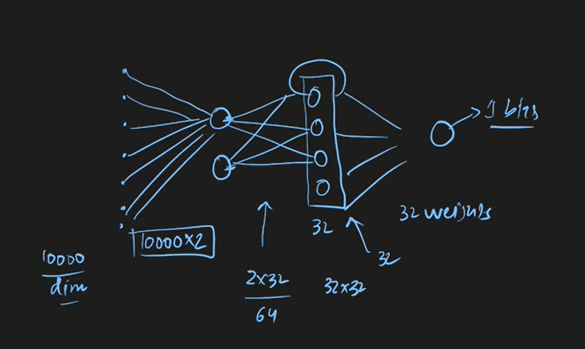

In [70]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.5993 - loss: 0.6327 - val_accuracy: 0.7885 - val_loss: 0.4539
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8299 - loss: 0.3908 - val_accuracy: 0.7961 - val_loss: 0.4425
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8584 - loss: 0.3411 - val_accuracy: 0.7967 - val_loss: 0.4497
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8646 - loss: 0.3323 - val_accuracy: 0.7910 - val_loss: 0.4691
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8734 - loss: 0.3159 - val_accuracy: 0.7800 - val_loss: 0.4886
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8754 - loss: 0.3165 - val_accuracy: 0.7777 - val_loss: 0.5150
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8816 - loss: 0.3048 - val_accuracy: 0.7747 - val_loss: 0.5268
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8837 - loss: 0.3020 - val_accuracy: 